In [55]:
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

import matplotlib.pyplot as plt
import seaborn as sns

import time
import pylab as pl
from IPython import display


In [56]:
print(load_diabetes()['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [57]:

data = load_diabetes(return_X_y=True, as_frame=True)


In [58]:
data[0]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [59]:
selected_feature = "bmi"

X = data[0][selected_feature].values
X = X.reshape(X.shape[0], 1)
y = data[1].values


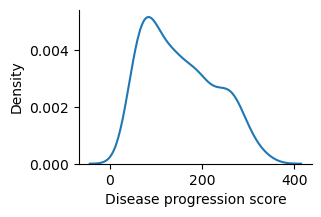

In [60]:
fig = plt.figure(figsize=(3, 2))
sns.kdeplot(y)
plt.xlabel('Disease progression score')
sns.despine(top=True, right=True)
plt.show()

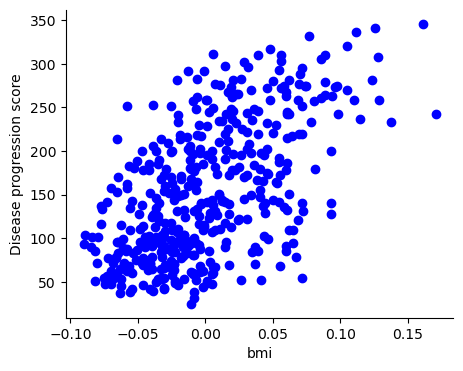

In [61]:
fig = plt.figure(figsize=(5, 4))
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel(selected_feature)
plt.ylabel('Disease progression score')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


# Let's fit the linear regression model: y = XW


## Step 1: Closed form solution of Least Square Objective: W = (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>Y

Estimated params are : [152.13348416 949.43526038]


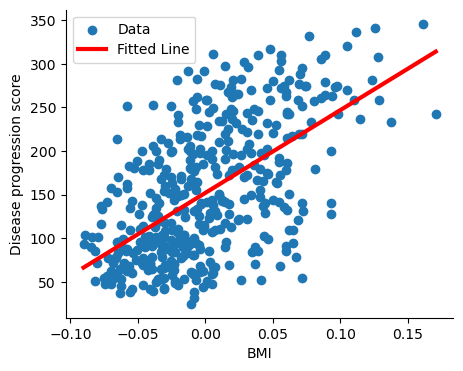

In [62]:
# Adding a bias term as the first feature

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

params_from_closed_form = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

print(f'Estimated params are : {params_from_closed_form}')

fig = plt.figure(figsize=(5, 4))
plt.scatter(X, y, label='Data')
plt.xlabel('BMI')
plt.ylabel('Disease progression score')

x_values = np.linspace(np.min(X), np.max(X), 100)
y_values = params_from_closed_form[0] + params_from_closed_form[1] * x_values
plt.plot(x_values, y_values, color='red', label='Fitted Line', linewidth=3)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.legend()
plt.show()


## Step 2: Iterative solution using Least Square Objective and Gradient Descent optimization

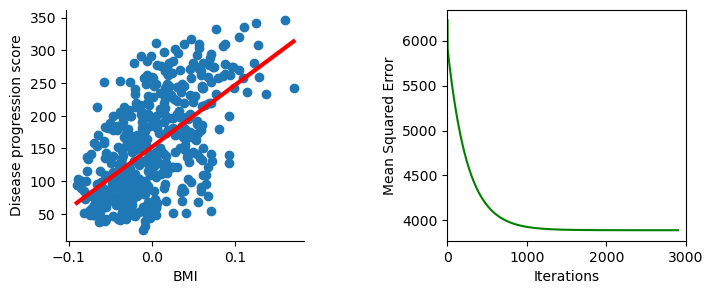

In [65]:

num_iterations = 3000
eta = 0.001

# Adding a bias term as the first feature
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Randomly intialize the params
np.random.seed(0)
params = np.random.rand(X_bias.shape[1])
initial_params = params.copy()

mse = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))  # Create a figure with two subplots
fig.subplots_adjust(wspace=0.6)  # Adjust the spacing between subplots

ax1.scatter(X, y, label='Data')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
x_values = np.linspace(np.min(X), np.max(X), 100)

for i in range(num_iterations):
    y_pred = np.dot(X_bias, params)
    error = (y_pred - y)
    squared_error = error ** 2
    mean_squared_error = np.mean(squared_error)
    mse.append(mean_squared_error)  # Store the mean squared error
    gradient = 2 * np.dot(X_bias.T, error)
    params -= eta * gradient

    if i % 100 == 0 and i > 0:  # Skip the first iteration
        y_values = params[0] + params[1] * x_values
        ax1.cla()  # Clear the previous plot in the first subplot
        ax1.scatter(X, y, label='Data')
        ax1.set_xlabel('BMI')
        ax1.set_ylabel('Disease progression score')
        ax1.plot(x_values, y_values, color='red', label='Fitted Line', linewidth=3)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)

        ax2.cla()  # Clear the previous plot in the second subplot
        ax2.plot(range(1, len(mse)), mse[1:], color='green', label='Mean Squared Error')
        ax2.set_xlabel('Iterations')
        ax2.set_ylabel('Mean Squared Error')
        ax2.set_xlim(0, num_iterations)

        display.clear_output(wait=True)
        display.display(pl.gcf())
        time.sleep(0.1)

# Clear the output and the figure after the loop finishes
display.clear_output(wait=True)
plt.close(fig)

In [66]:
print(f'Initial params:{initial_params}')
print(f'Final params: {params}')
print(f'Params from closed form solution : {params_from_closed_form}')


Initial params:[0.5488135  0.71518937]
Final params: [152.13348416 947.09770478]
Params from closed form solution : [152.13348416 949.43526038]
